# Finding multi e and single e s2

Looking at both Double scatter and Single scatter sim data to distinguish multi-e and single-e s2 populations

In [139]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [1]:
import hax
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from matplotlib.colors import LogNorm
from collections import defaultdict
from array import array
import pylab
from hax import cuts

# Import Single scatter and Double scatter NR data in two dataframes

In [2]:
hax.init(experiment='XENON1T',
         use_runs_db=False,
         pax_version_policy='loose',
         main_data_paths=['~/data/nrsim/SWdoubleevents'],
         minitree_paths = ['~/data/nrsim/SWdoubleevents'])

class PeaksInTPC(hax.treemakers.peak_treemakers.PeakExtractor):
    __version__ = '0.0.1'
    stop_after = 200
    peak_cut_list = ['detector == "tpc"', 'type !="lone_hit"']
    peak_fields = ['area','center_time', 'range_50p_area','type',
                   'n_hits','area_fraction_top','height','hit_time_std',
                   'hits_fraction_top','bottom_hitpattern_spread',
                   'n_contributing_channels_top','n_contributing_channels']

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


In [3]:
df_ms = hax.minitrees.load("SWdoubleevents",[PeaksInTPC])

DEBUG:hax.minitrees] Found minitree at /home/shawaf/data/nrsim/SWdoubleevents/SWdoubleevents_PeaksInTPC.root
DEBUG:hax.minitrees] Found minitree at /home/shawaf/data/nrsim/SWdoubleevents/SWdoubleevents_PeaksInTPC.root
DEBUG:hax.minitrees] Removing weird index column


In [4]:
hax.init(experiment='XENON1T',
         use_runs_db=False,
         pax_version_policy='loose',
         main_data_paths=['~/data/nrsim'],
         minitree_paths = ['~/data/nrsim'])

class PeaksInTPC(hax.treemakers.peak_treemakers.PeakExtractor):
    __version__ = '0.0.1'
    stop_after = 200
    peak_cut_list = ['detector == "tpc"', 'type !="lone_hit"']
    peak_fields = ['area','center_time', 'range_50p_area','type',
                   'n_hits','area_fraction_top','height','hit_time_std',
                   'hits_fraction_top','bottom_hitpattern_spread',
                   'n_contributing_channels_top','n_contributing_channels']

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


In [5]:
df_ss = hax.minitrees.load("NRSIMRAW",[PeaksInTPC])

In [6]:
df_ss = df_ss.sort(['event_number','area'],ascending = [1,0]).reset_index()

/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Building dataframes for (2-5)th largest peak for both ms and ss

In [41]:
ss_largest = pd.DataFrame(columns = list(df_ss))
ss_2nd_largest = pd.DataFrame(columns = list(df_ss))
ss_3rd_largest = pd.DataFrame(columns = list(df_ss))
ss_4th_largest = pd.DataFrame(columns = list(df_ss))
ss_5th_largest = pd.DataFrame(columns = list(df_ss))

for i in range(0,df_ss["event_number"].iloc[-1],1):
    r1 = df_ss[df_ss["event_number"] == i].iloc[0]
    r2 = df_ss[df_ss["event_number"] == i].iloc[1]
    r3 = df_ss[df_ss["event_number"] == i].iloc[2]
    r4 = df_ss[df_ss["event_number"] == i].iloc[3]
    r5 = df_ss[df_ss["event_number"] == i].iloc[4]
    
    ss_largest = ss_largest.append(r1)
    ss_2nd_largest = ss_2nd_largest.append(r2)
    ss_3rd_largest = ss_3rd_largest.append(r3)
    ss_4th_largest = ss_4th_largest.append(r4)
    ss_5th_largest = ss_5th_largest.append(r5)
    

ms_largest = pd.DataFrame(columns = list(df_ms))
ms_2nd_largest = pd.DataFrame(columns = list(df_ms))
ms_3rd_largest = pd.DataFrame(columns = list(df_ms))
ms_4th_largest = pd.DataFrame(columns = list(df_ms))
ms_5th_largest = pd.DataFrame(columns = list(df_ms))

for i in range(0,df_ms["event_number"].iloc[-1],1):
    r1 = df_ms[df_ms["event_number"] == i].iloc[0]
    r2 = df_ms[df_ms["event_number"] == i].iloc[1]
    r3 = df_ms[df_ms["event_number"] == i].iloc[2]
    r4 = df_ms[df_ms["event_number"] == i].iloc[3]
    r5 = df_ms[df_ms["event_number"] == i].iloc[4]
    
    ms_largest = ms_largest.append(r1)
    ms_2nd_largest = ms_2nd_largest.append(r2)
    ms_3rd_largest = ms_3rd_largest.append(r3)
    ms_4th_largest = ms_4th_largest.append(r4)
    ms_5th_largest = ms_5th_largest.append(r5)

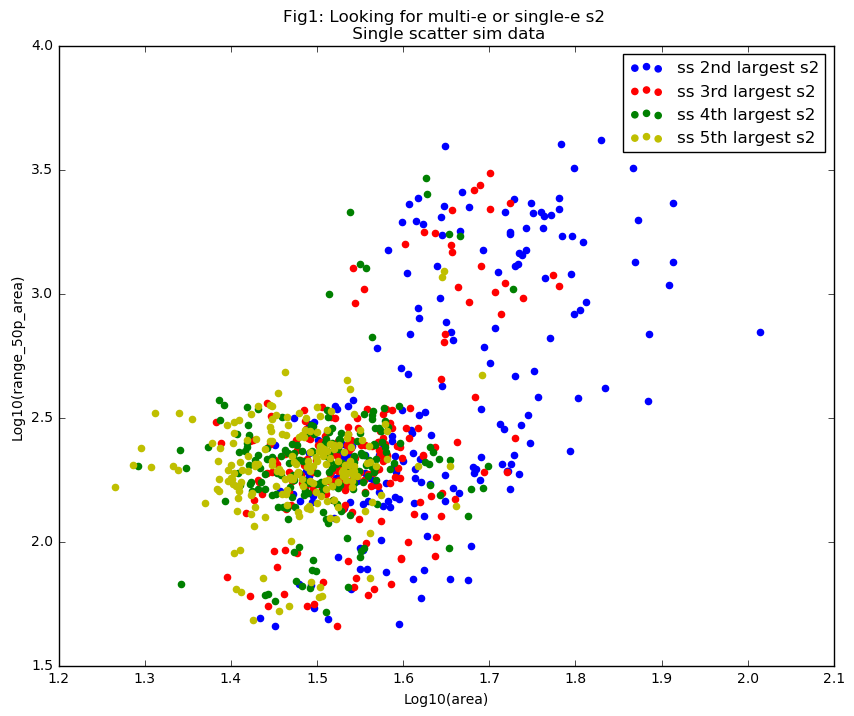

In [111]:
plt.figure(figsize = (10,8))
# plt.scatter(np.log10(ss_largest.area),np.log10(ss_largest.range_50p_area),color='m',label = 'ss largest s2')
plt.scatter(np.log10(ss_2nd_largest.area),np.log10(ss_2nd_largest.range_50p_area),color='b',label = 'ss 2nd largest s2')
plt.scatter(np.log10(ss_3rd_largest.area),np.log10(ss_3rd_largest.range_50p_area),color='r', label = 'ss 3rd largest s2')
plt.scatter(np.log10(ss_4th_largest.area),np.log10(ss_4th_largest.range_50p_area),color='g', label = 'ss 4th largest s2')
plt.scatter(np.log10(ss_5th_largest.area),np.log10(ss_5th_largest.range_50p_area),color='y', label = 'ss 5th largest s2')
plt.xlabel('Log10(area)')
plt.ylabel('Log10(range_50p_area)')
plt.title('Fig1: Looking for multi-e or single-e s2 \n Single scatter sim data')
plt.legend()
plt.show()

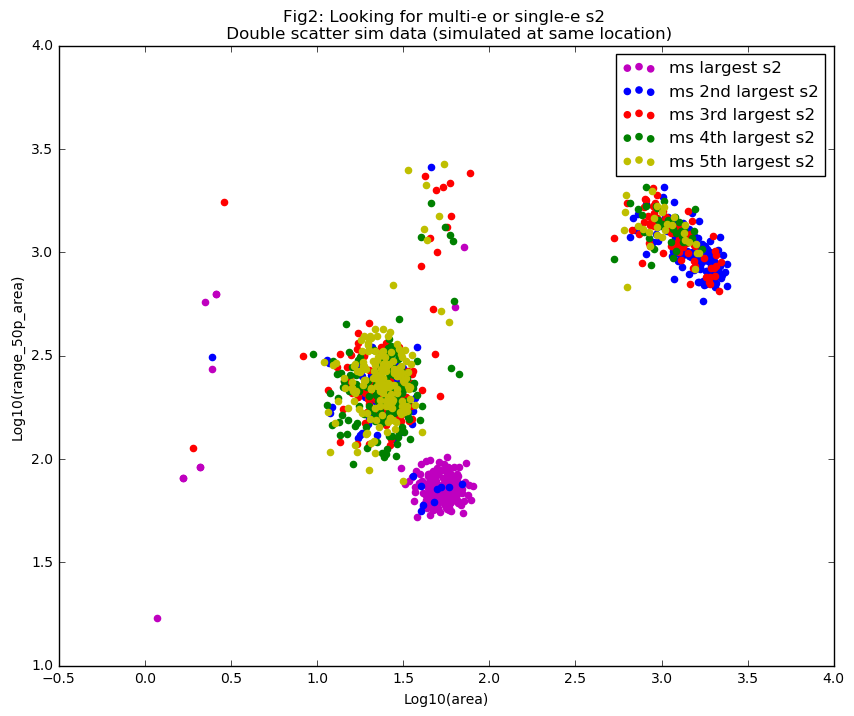

In [100]:
plt.figure(figsize = (10,8))
plt.scatter(np.log10(ms_largest.area),np.log10(ms_largest.range_50p_area),color='m',label = 'ms largest s2')
plt.scatter(np.log10(ms_2nd_largest.area),np.log10(ms_2nd_largest.range_50p_area),color='b',label = 'ms 2nd largest s2')
plt.scatter(np.log10(ms_3rd_largest.area),np.log10(ms_3rd_largest.range_50p_area),color='r', label = 'ms 3rd largest s2')
plt.scatter(np.log10(ms_4th_largest.area),np.log10(ms_4th_largest.range_50p_area),color='g', label = 'ms 4th largest s2')
plt.scatter(np.log10(ms_5th_largest.area),np.log10(ms_5th_largest.range_50p_area),color='y', label = 'ms 5th largest s2')
plt.xlabel('Log10(area)')
plt.ylabel('Log10(range_50p_area)')

plt.title('Fig2: Looking for multi-e or single-e s2 \n Double scatter sim data (simulated at same location)')
plt.legend()
plt.show()

From Fig1, the scatters are single and simulated all over the detector. The area and width of the s2's are not corrected, which would be the same as s2 multi-e, single-e s2 data from the detector (no z to correct s2 from). Fig2, the scatters are all double and simulated in the same spot. Something to be said about distribution of (1-5)th largest peaks

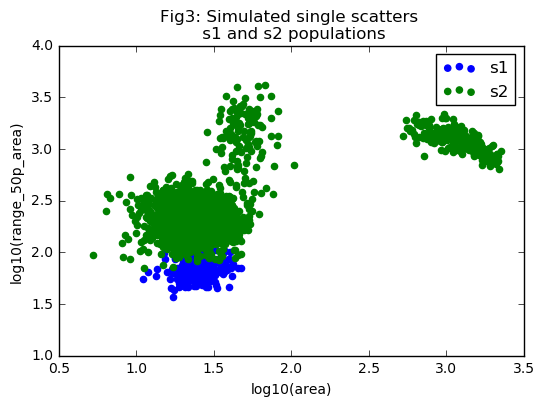

In [105]:
plt.scatter(np.log10(df_ss[df_ss.type == 1].area),
            np.log10(df_ss[df_ss.type == 1].range_50p_area),
            color = 'b',
           label = "s1")
plt.scatter(np.log10(df_ss[df_ss.type == 2].area),
            np.log10(df_ss[df_ss.type == 2].range_50p_area),
            color = 'g',
           label = "s2")
plt.xlabel("log10(area)")
plt.ylabel("log10(range_50p_area)")
plt.title("Fig3: Simulated single scatters \n s1 and s2 populations")
plt.legend()

plt.show()

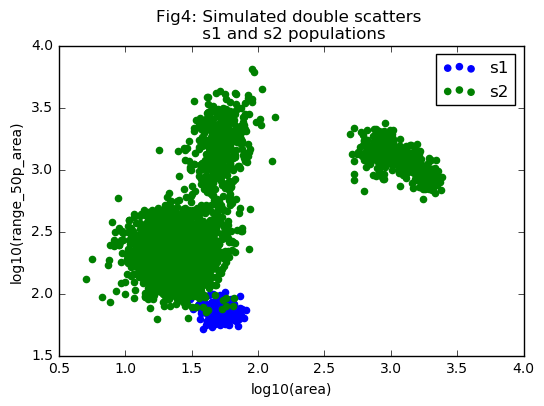

In [106]:
plt.scatter(np.log10(df_ms[df_ms.type == 1].area),
            np.log10(df_ms[df_ms.type == 1].range_50p_area),
            color = 'b',
           label = 's1')
plt.scatter(np.log10(df_ms[df_ms.type == 2].area),
            np.log10(df_ms[df_ms.type == 2].range_50p_area),
            color = 'g',
           label = 's2')

plt.xlabel("log10(area)")
plt.ylabel("log10(range_50p_area)")
plt.title("Fig4: Simulated double scatters \n s1 and s2 populations")
plt.legend()

plt.show()

Both in fig3 and 4, see clear groups of s2 populations. The lower ratio s2 population close to the s1 would be single electrons as they are similar in shape to s1. Above that population would be multi electrons since, intuitively, the signal is spread out more. The true scatter population creates the largest signal. I can cut the single electron and multi electron from the true scatters with log10(area) < 2.25 for both fig3 and 4. Then, I will have two sets of simulated multi, single e to test Tianyu's likelihood function on.

In [109]:
ss = df_ss[(df_ss.type == 2) & (np.log10(df_ss[df_ss.type == 2].area) < 2.25)]
ms = df_ms[(df_ms.type == 2) & (np.log10(df_ms[df_ms.type == 2].area) < 2.25)]

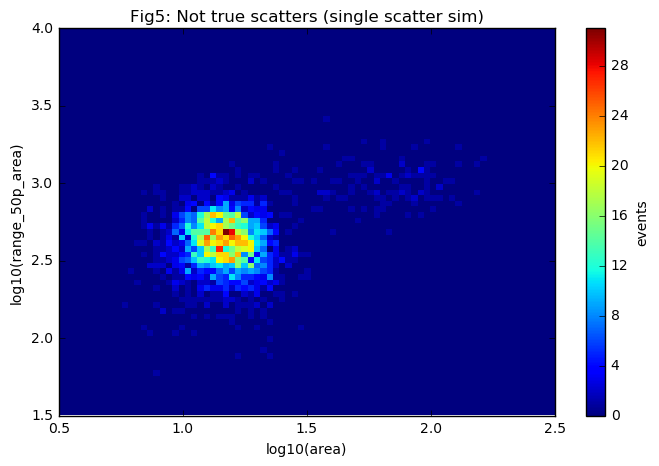

In [137]:
xedges = np.linspace(.5,2.5,70)
yedges = np.linspace(1.5,4,80)

plt.figure(figsize = (8,5))
H,xedges,yedges = np.histogram2d(np.log10(ss.area),np.log10(ss.range_50p_area), bins=(xedges, yedges))

im = plt.imshow(H, interpolation='nearest', origin='low',aspect = 'auto',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.xlabel("log10(area)")
plt.ylabel("log10(range_50p_area)")

plt.title("Fig5: Not true scatters (single scatter sim)")

plt.colorbar(label = "events")

plt.show()

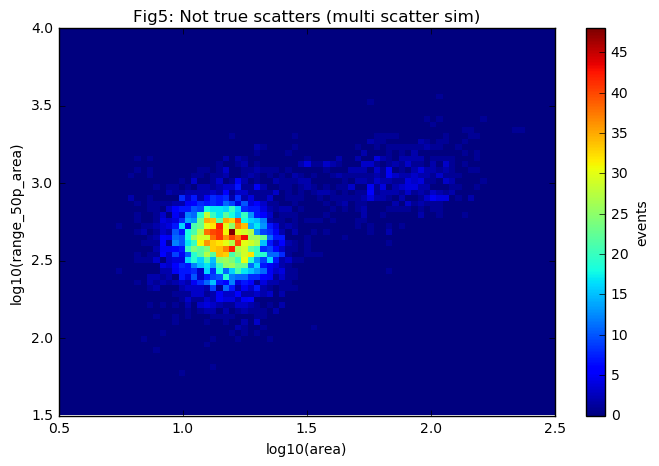

In [138]:
xedges = np.linspace(.5,2.5,70)
yedges = np.linspace(1.5,4,80)

plt.figure(figsize = (8,5))
H,xedges,yedges = np.histogram2d(np.log10(ms.area),np.log10(ms.range_50p_area), bins=(xedges, yedges))

im = plt.imshow(H, interpolation='nearest', origin='low',aspect = 'auto',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.xlabel("log10(area)")
plt.ylabel("log10(range_50p_area)")

plt.title("Fig5: Not true scatters (multi scatter sim)")

plt.colorbar(label = "events")

plt.show()

Don't see too much of a difference between fig4, 5. This makes sense as the photo ionizations causing single-e, multi-e could occur at random locations, caused by initial s1. The only difference is that the double scatters produce s1 photons from two nuclear recoils... this would produce more photo-ionizations... so does that mean multiple scatters could produce more pile-ups?

Now that I have two populations of not true scatters (one from single scatters and one from double scatters) I can try to use Tianyu's likelihood functions (or use his method to make my own from these). These likelihood functions will be used to determine likelihood of a given s2 being a single-e or multi-e pileup. If we can remove those multi-e or single-e s2 from a given waveform, it will be easier to determine if an event is a multi-scatter ( >1 s2) or single scatter (1 s2).